In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import pandas as pd 
train=pd.read_csv('/kaggle/input/titanic/train.csv')
print(train.head())

output=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
train.columns

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
test=pd.read_csv('/kaggle/input/titanic/test.csv')
print(test.head())
test.columns

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
print(train.shape)
print(test.shape)


(891, 12)
(418, 11)


Text(0, 0.5, 'survuved')

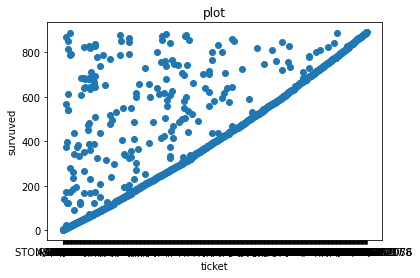

In [5]:
x_axis=train['Ticket']
y_axis=train['PassengerId']
import matplotlib.pyplot as plt 
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(x_axis,y_axis)
plt.title('plot')
plt.xlabel('ticket')
plt.ylabel('survuved')


In [6]:
print(train.isna().sum())
print(test.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
data = pd.concat([train, test], sort = False)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:

#Fill Missing numbers with median
data['Age'] = data['Age'].fillna(value=data['Age'].median())
data['Fare'] = data['Fare'].fillna(value=data['Fare'].median())
data.info()
data['Embarked'] = data['Embarked'].fillna('S')
data['Cabin'] = data['Cabin'].fillna('NAN')
data['Cabin']=data['Cabin'].replace('NAN','C205')
data.info()
print(data.isna().sum())
print(data['Cabin'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survi

In [9]:
# binarizing sex column
data.Sex[data.Sex == 'male'] = 1
data.Sex[data.Sex == 'female'] = 0

print(data['Sex'])

0      1
1      0
2      0
3      0
4      1
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 1309, dtype: object


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
# names column titles
import re
def get_title(name):
    title_search = re.search('([A-Za-z]+\.)', name)
    
    if title_search:
        return title_search.group(1)
    return ""
data['Names'] = data['Name'].apply(get_title)
data['Names'].value_counts()

print(data['Names'])

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Names, Length: 1309, dtype: object


In [11]:
#Age
data.loc[ data['Age'] <= 20, 'Age'] = 0
data.loc[(data['Age'] > 20) & (data['Age'] <= 40), 'Age'] = 1
data.loc[ data['Age'] > 40, 'Age'] = 2
print(data['Age'].head(100))

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
     ... 
95    1.0
96    2.0
97    1.0
98    1.0
99    1.0
Name: Age, Length: 100, dtype: float64


In [12]:
print(data.head)


<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name Sex  Age  SibSp  Parch  \
0                              Braund, Mr. Owen Harris   1  1.0      1      0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...   0  1.0      1      0   
2                               Heikkinen, Miss. Laina   0  1.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)   0  1.0      1      0   
4                             Allen, Mr. William Henry   1  1.0      0      0   
..                         

In [13]:
# survived column
rand=np.random.randint(0,1)
data['Survived']=data['Survived'].replace(np.nan,rand)
print(data['Survived'])

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
413    0.0
414    0.0
415    0.0
416    0.0
417    0.0
Name: Survived, Length: 1309, dtype: float64


End of feature enginering

In [14]:
import pandas as pd

data=pd.get_dummies(data)

# making model

X=data.drop("Survived",axis=1)
y=data['Survived']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.1)

# Logistic Regression 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
pred=[]
log=LogisticRegression(C=0.5,penalty='l2',l1_ratio=0)
res=log.fit(X_train,y_train.values.ravel())
pred=log.predict(X_test)
print(accuracy_score(pred,y_test))

print('confusion matrix')
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1317: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


0.8320610687022901
confusion matrix
[[88 12]
 [10 21]]
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89       100
         1.0       0.64      0.68      0.66        31

    accuracy                           0.83       131
   macro avg       0.77      0.78      0.77       131
weighted avg       0.84      0.83      0.83       131



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [15]:
from sklearn.svm import SVC

# Support vector
svc=SVC()

model=svc.fit(X_train,y_train)
pred=svc.predict(X_test)

svc_score=svc.score(X_train,y_train)

print(svc_score)
print(confusion_matrix(y_test, pred))


0.7470288624787776
[[100   0]
 [ 30   1]]


In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=80)
rfc.fit(X_train,y_train)

pred=rfc.predict(X_test)
Score=rfc.score(X_test,y_test)
print(Score)
print(confusion_matrix(y_test, pred))

0.9083969465648855
[[97  3]
 [ 9 22]]
